b'Dataset: bricks\nStart main dataset: bricks WINSIZE 15000\nLoading bricks\ninitialize memory pool 15000  208  272\ndone..\n0K - 15K   0.00 -  0.00\nSaving data result/bricks/bin/flo_0_00000.bin, 0_0000\n0K - 15K   0.00 -  0.00\nSaving data result/bricks/bin/flo_0_00001.bin, 0_0001\n0K - 15K   0.00 -  0.00\nSaving data result/bricks/bin/flo_0_00002.bin, 0_0002\n0K - 15K   0.00 -  0.00\nSaving data result/bricks/bin/flo_0_00003.bin, 0_0003\n0K - 15K   0.00 -  0.00\nSaving data result/bricks/bin/flo_0_00004.bin, 0_0004\n0K - 15K   0.00 -  0.00\nSaving data result/bricks/bin/flo_0_00005.bin, 0_0005\n0K - 15K   0.00 -  0.00\nSaving data result/bricks/bin/flo_0_00006.bin, 0_0006\n0K - 15K   0.00 -  0.00\nSaving data result/bricks/bin/flo_0_00007.bin, 0_0007\n0K - 15K   0.00 -  0.00\nSaving data result/bricks/bin/flo_0_00008.bin, 0_0008\n0K - 15K   0.00 -  0.00\nSaving data result/bricks/bin/flo_0_00009.bin, 0_0009\n0K - 15K   0.00 -  0.00\nSaving data result/bricks/bin/flo_0_00010.bin, 0_0

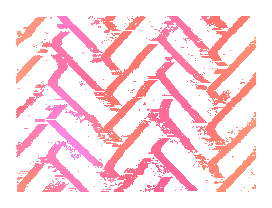

10


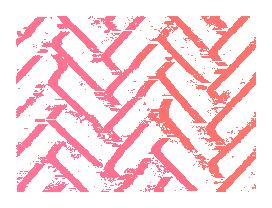

20


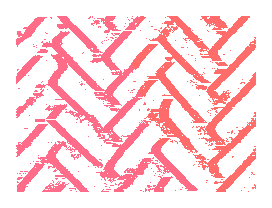

30


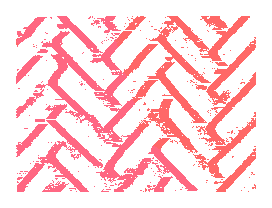

40


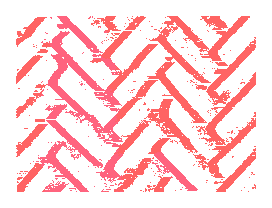

50


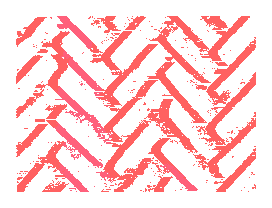

60


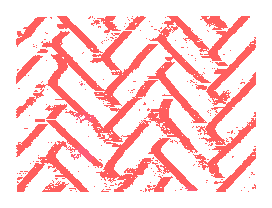

70


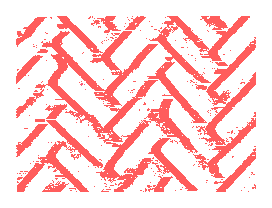

80


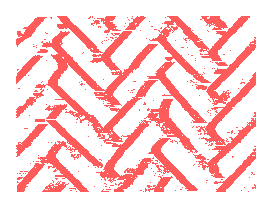

90


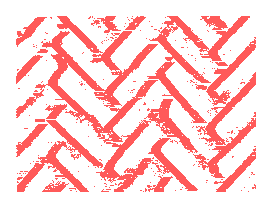

(208, 272, 2)


In [57]:

import numpy as np
import flow_vis
import command 
from IPython.display import Image, display

# dataset = "dummy"
dataset = "debug"
# dataset = "bricks"
# dataset = "bricks_1slide"
# dataset = "indoor_flying2"
# dataset = "qr000"

bin_path = 'result/{}/bin/flo_{:1d}_{:05d}.bin'
png_path = 'result/{}/png/flo_{:1d}_{:05d}.png'

if dataset=="indoor_flying2":
    B, W, H, C = 2921002, 368,288, 2
    n_itr_show = 1
    WINSIZE = 1000
    n_itr = B//WINSIZE
    # n_itr = 10|
    b_show=False
    run_cpp= False
    cmd = ['./process', '-1', dataset]
elif dataset=="qr000":
    B, W, H, C = 1418870, 1312,752, 2
    n_itr_show = 1
    WINSIZE = 1000
    n_itr = B//WINSIZE
    # n_itr = 10|
    b_show=False
    run_cpp= False
    cmd = ['./process', '-1', dataset]
elif dataset=="debug":
    dataset="bricks"
    B, W, H, C = 15000, 272,208, 2
    n_itr_show = 10
    WINSIZE = 15000
    n_itr   = 100
    b_show=True
    run_cpp= True
    cmd = ['./process', '-1', "bricks",  '15000']
else:
    B, W, H, C = 15000, 272,208, 2
    n_itr_show = 1
    WINSIZE = 1000
    n_itr   = B//WINSIZE
    b_show=True
    run_cpp= True
    cmd = ['./process', '-1', dataset]

# n_itr = 10

if run_cpp:
    res = command.run(cmd) 
    print(res.output)
    print(res.exit)

for index in [0]:
    for itr in range(n_itr):
        if itr%n_itr_show==0:
            print(itr)
            bin_path_ = bin_path.format(dataset, index, itr)
            png_path_ = png_path.format(dataset, index, itr)
            flo = np.fromfile(bin_path_, dtype=np.float64).reshape([H,W,C])
            flow_vis.save_flo(flo, png_path_)
            if b_show:
                display(Image(filename=png_path_)) 

print(flo.shape)

